# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import random
import numpy as np
from functools import reduce

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
possibilities = [1, 2, 3, 4, 5, 6]
results = [possibilities[random.randint(0, len(possibilities) - 1)] for i in range(10)]
df = pd.DataFrame(results, columns=["Results"])
df

,Results
0,6
1,3
2,1
3,1
4,5
5,1
6,1
7,2
8,3
9,2


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

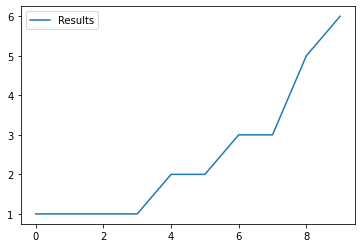

In [3]:
# your code here
df = df.sort_values(by="Results", ignore_index=True)
df.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:ylabel='Frequency'>

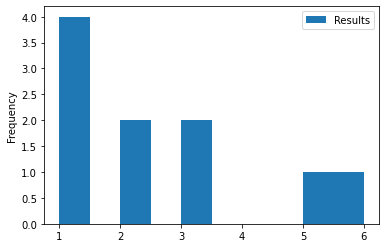

In [4]:
# your code here
df.plot.hist()

In [5]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def observations_mean(data):
    
    total = sum(data)
    return total / len(data)


In [7]:
df_results = df["Results"]
sum(df_results)

25

In [8]:
observations_mean(df_results)

2.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
sum(df_results.value_counts()) / df_results.count()
df_results.count()

10

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here

def mediane(data):
    
    if len(data) % 2 != 0:
        mediane = data[len(data) // 2]
    else:
        mediane = (data[len(data) // 2] + data[len(data) // 2 + 1]) / len(data)
    
    return mediane
    

In [11]:
mediane(df_results)

0.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [12]:
# your code here

def find_quartiles(data):
    
    if len(data) % 2 == 0:
        interval = data[:int(len(data) / 2)]
        Q1 = mediane(interval)
        Q3 = Q1 + mediane(data)
    else:
        interval_end = (data[len(data) // 2] + data[len(data) // 2 + 1]) / 2
        interval = data[:int(interval_end)]
        Q1 = mediane(interval)
        Q3 = Q1 + mediane(data)
    
    return f"Q1 = {Q1}, Q3 = {Q3}"
        

In [13]:
find_quartiles(df_results)

'Q1 = 1, Q3 = 1.5'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

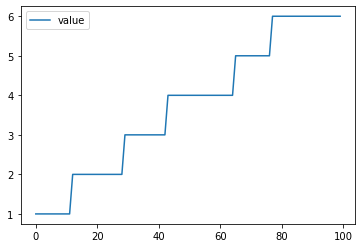

In [14]:
# your code here
roll_dice = pd.read_csv("/Users/bene/Downloads/module_2/Lab_4_Descriptive_Statistics/roll_the_dice_hundred.csv")
roll_dice = roll_dice.sort_values("value", ignore_index=True)
roll_dice.plot(y="value")

In [15]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [16]:
# your code here
observations_mean(roll_dice["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [17]:
# your code here
freq_distribution = roll_dice["value"].value_counts()
freq_distribution

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:ylabel='Frequency'>

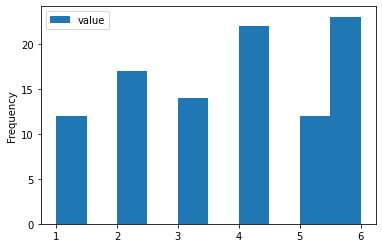

In [18]:
# your code here
roll_dice.plot.hist(y="value")


In [19]:
"""
Frequencies of the number equal to 4 or higher than the frequencies of the numbers equal to 3 and lower, which
explains the mean greater than 3, as seen in the frequency distribution
"""

'\nFrequencies of the number equal to 4 or higher than the frequencies of the numbers equal to 3 and lower, which\nexplains the mean greater than 3, as seen in the frequency distribution\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

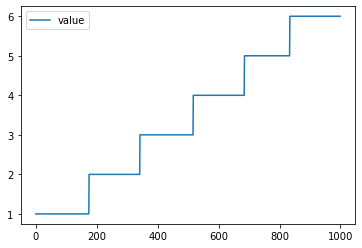

In [20]:
# your code here
roll_dice_thousand = pd.read_csv("roll_the_dice_thousand.csv")
roll_dice_thousand = roll_dice_thousand.sort_values(by="value", ignore_index=True)
roll_dice_thousand.plot(y="value")

In [21]:
"""
your comments here
Frequencies are closer to each other than they were after a hundred throws, which seems logical as there was more throws here
"""

'\nyour comments here\nFrequencies are closer to each other than they were after a hundred throws, which seems logical as there was more throws here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [22]:
import seaborn as sns

In [34]:
# your code here
ages = pd.read_csv("ages_population.csv")
ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,observation
0,1.0
1,1.0
2,2.0
3,2.0
4,4.0
...,...
995,69.0
996,70.0
997,71.0
998,73.0


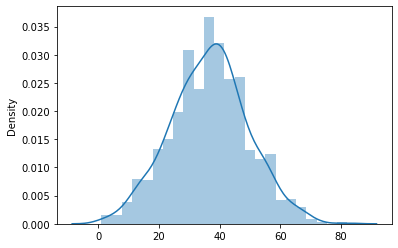

In [37]:
ages = ages.sort_values(by="observation", ignore_index=True)
sns.distplot(a=ages)
ages
# By looking at the graph, a suppose the mean

In [36]:
ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [27]:
# your code here
ages.mean()

observation    36.56
dtype: float64

In [29]:
ages.std()

observation    12.8165
dtype: float64

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [35]:
ages2

,observation
0,19.0
1,19.0
2,19.0
3,20.0
4,20.0
...,...
995,35.0
996,35.0
997,35.0
998,36.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

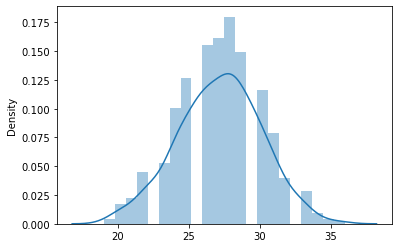

In [31]:
# your code here
ages2 = pd.read_csv("ages_population2.csv")
ages2 = ages2.sort_values(by="observation", ignore_index=True)
sns.distplot(a=ages2)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [32]:
# your code here
ages2.mean()

observation    27.155
dtype: float64

In [33]:
ages2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,observation
0,19.0
1,19.0
2,19.0
3,20.0
4,20.0
...,...
995,35.0
996,35.0
997,35.0
998,36.0


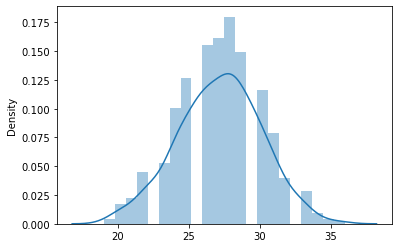

In [38]:
# your code here
ages3 = pd.read_csv("ages_population3.csv")
ages3 = ages2.sort_values(by="observation", ignore_index=True)
sns.distplot(a=ages3)
ages3

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [39]:
# your code here
ages3.mean()

observation    27.155
dtype: float64

In [40]:
ages3.std()

observation    2.969814
dtype: float64

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [41]:
# your code here
find_quartiles(ages3)

KeyError: 250

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""